# Transformada de Fourier con Python

Sea $f(x)$ una función conocida en $N$ puntos separados uniformemente dentro del intervalo $[a, b]$, con $a = x_0$ y $b = x_0 + L$. Es decir, una función _discretizada_. La transformada discreta de Fourier (DFT) $\hat{f}$ de $f$ es el análogo discreto de la serie de Fourier de una función continua. Se obtiene con:

$$
\hat{f}(k) = \frac{1}{\sqrt{2\pi}} \sum_{n = 0}^{N - 1} f(x_n)e^{ix_nk}\Delta
$$

donde $x_n = x_0 + n\Delta$ y $\Delta = L / N$.

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def onda_armonica(A, phi, omega = 1.0, delta = 0.0):
    return A * np.sin(omega * phi + delta)

In [47]:
def sumar_ondas(onda1, onda2): # Asume mismo intervalo y división para la fase
    return onda1 + onda2

In [46]:
def trans_fourier(funcion, valores_x):
    normalizacion = np.divide(1.0, np.power(2.0 * np.pi, 0.5))
    valores_freq = valores_x 
    f_k = []
    N = len(valores_freq)
    delta = abs(valores_x[1] - valores_x[0])
    
    for i in range(N):
        terminos = []
        
        for n in range(N - 1):
            parte_exp = np.exp(-complex(0,1) * valores_x[n] * valores_freq[i])
            terminos.append(funcion[n] * parte_exp * delta)
            
        f_k.append(normalizacion * np.sum(terminos))
        
    return [valores_freq, np.array(f_k)]

In [69]:
def inv_fourier(transformada, valores_k):
    normalizacion = np.divide(1.0, np.power(2.0 * np.pi, 0.5))
    valores_x = valores_k 
    f_x = []
    N = len(valores_x)
    delta = abs(valores_k[1] - valores_k[0])
    
    for i in range(N):
        terminos = []
        
        for n in range(N - 1):
            parte_exp = np.exp(complex(0,1) * valores_k[n] * valores_x[i])
            terminos.append(transformada[n] * parte_exp * delta)
            
        f_x.append(normalizacion * np.sum(terminos))
        
    return [valores_x, np.array(f_x)]

In [58]:
n = 400
A1 = 3.0
frec1 = 3.0
fase = np.linspace(0.0, 16.0 * math.pi, n)
onda1 = onda_armonica(A1, fase, frec1)

A2 = 4.2
frec2 = 0.5
onda2 = onda_armonica(A2, fase, frec2)

Tenemos dos ondas con distinta frecuencia.

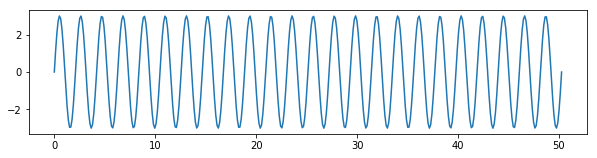

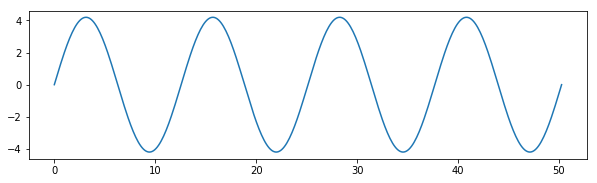

In [59]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.plot(fase, onda1)

plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 2)
plt.plot(fase, onda2)

Las sumamos.

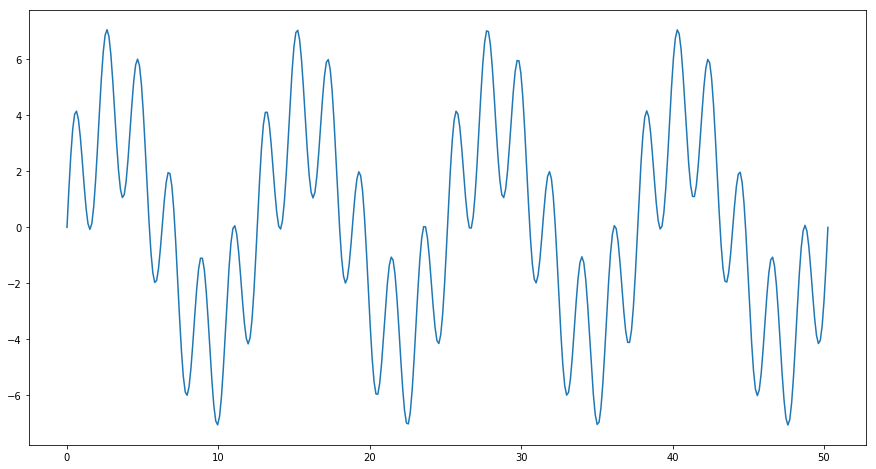

In [60]:
onda_nueva = sumar_ondas(onda1, onda2)
plt.figure(figsize = (15, 8))
plt.plot(fase, onda_nueva)

In [61]:
k1, onda1_trans = trans_fourier(onda1, fase)
trans1_real = [i.real for i in onda1_trans]

k2, onda2_trans = trans_fourier(onda2, fase)
trans2_real = [i.real for i in onda2_trans]

Podemos transformar cada onda por separado...

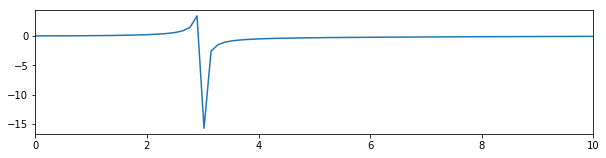

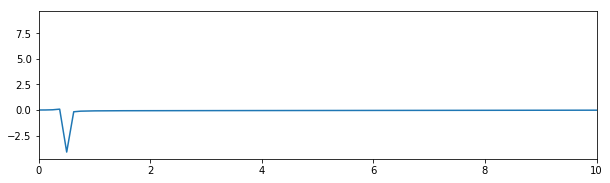

In [65]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.xlim([0.0, 10.0])
plt.plot(k1, trans1_real)

plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 2)
plt.xlim([0.0, 10.0])
plt.plot(k2, trans2_real)

In [62]:
k, ondas_trans = trans_fourier(onda_nueva, fase)
trans_real = [i.real for i in ondas_trans]

...o la suma de ambas.

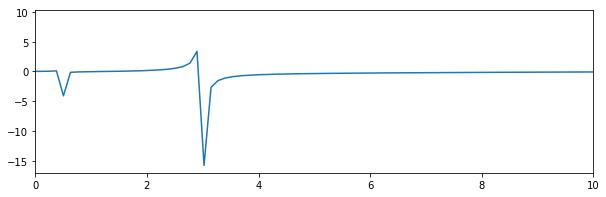

In [72]:
plt.figure(figsize = (10, 3))
plt.xlim([0.0, 10.0])
plt.plot(k, trans_real)

Por último, podemos hacer la transformada inversa.

In [75]:
x, inversa = inv_fourier(ondas_trans, k)

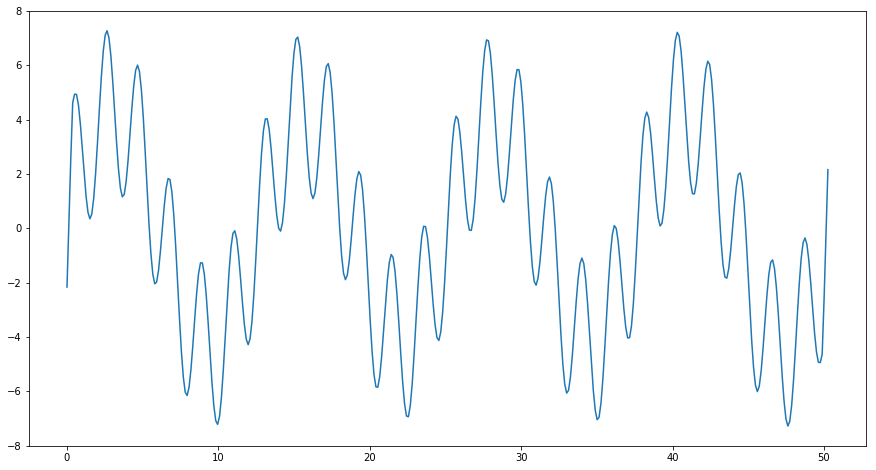

In [76]:
plt.figure(figsize = (15, 8))
plt.plot(x, inversa)